<a href="https://colab.research.google.com/github/Batorejro/Machine-Learning-boot/blob/main/polar_scam14_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
df_raw = pd.read_csv('penguins.csv')
df_raw.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


In [9]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        344 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.6 KB


In [11]:
features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
target = 'Species'
X, y = df[features], df[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,FlipperLength,BodyMass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0



y:


,Species
0,0
1,0
2,0
3,0
4,0
...,...
339,2
340,2
341,2
342,2


In [12]:
pd.Series(y).value_counts(normalize=True)

,proportion
Species,
0,0.441860
1,0.360465
2,0.197674


sprawdzamy czy nie ma dubli

In [13]:
df[df.duplicated()]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species


Opis w macierzy transponowanej

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CulmenLength,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
CulmenDepth,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
FlipperLength,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
BodyMass,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0
Species,344.0,0.755814,0.762626,0.0,0.000,1.00,1.0,2.0


In [21]:
df.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.755814
std,5.459584,1.974793,14.061714,801.954536,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


Unique values: 165


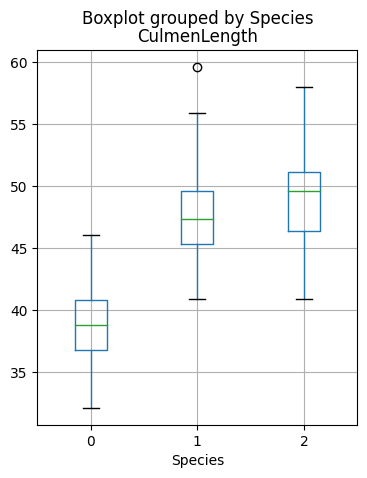

Unique values: 81


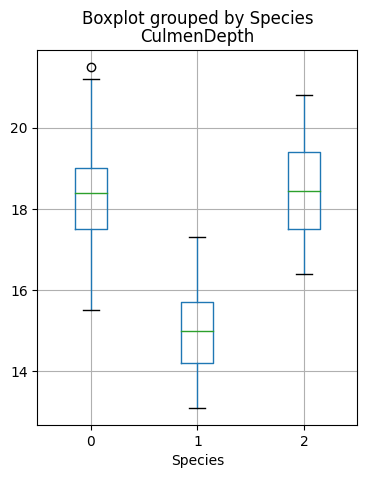

Unique values: 56


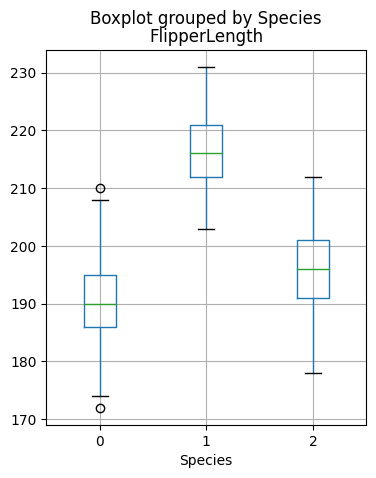

Unique values: 95


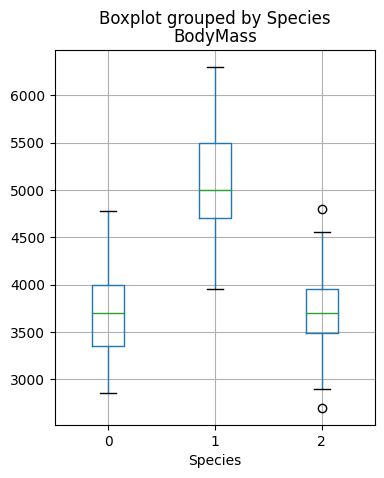

In [23]:
import matplotlib.pyplot as plt
for co in features:
    print(f'Unique values: {len(df[co].unique())}')
    df.boxplot(column=co, by='Species', figsize=(4,5))
    plt.title(co)
    plt.show()

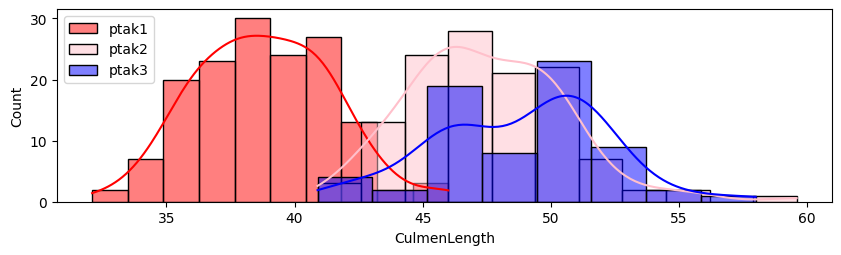

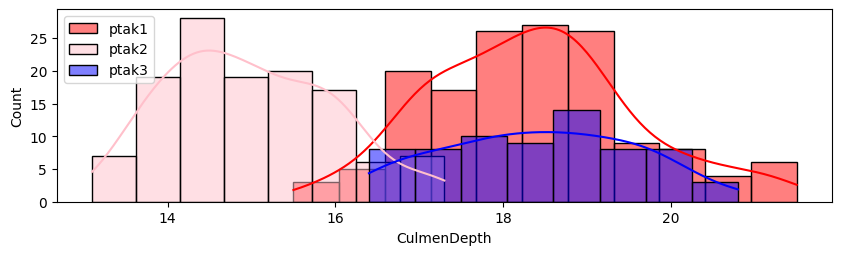

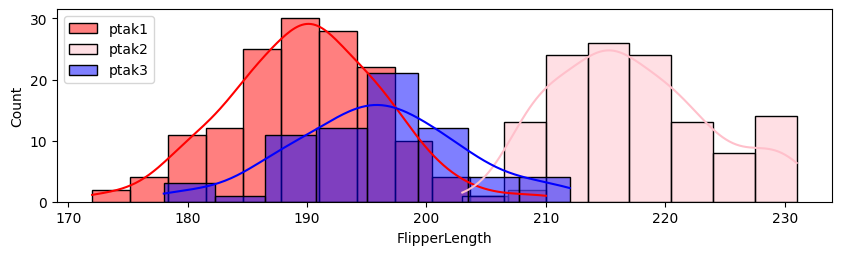

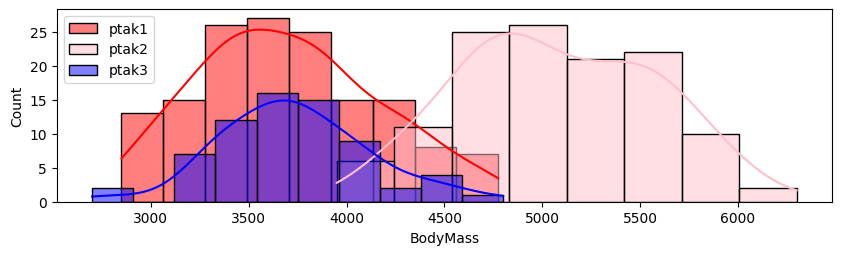

In [29]:
import seaborn as sns
for co in features:
    plt.figure(figsize=(10, 2.5))
    sns.histplot(df.loc[df['Species']==0, co], kde=True, color='red', label='ptak1')
    sns.histplot(df.loc[df['Species']==1, co], kde=True, color='pink', label='ptak2')
    sns.histplot(df.loc[df['Species']==2, co], kde=True, color='blue', label='ptak3')
    plt.legend(loc='upper left')
    plt.show()

Korelacje

In [36]:
#import plotly.express as px
#px.histogram(df, x='CulmenLength', width=400, height=200, nbins=50, facet_col= 'Species', facet_row= 'FlipperLength')
corr = df.corr()
corr

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
CulmenLength,1.000000,-0.235053,0.656181,0.595110,0.779857
CulmenDepth,-0.235053,1.000000,-0.583851,-0.471916,-0.183090
FlipperLength,0.656181,-0.583851,1.000000,0.871202,0.357472
BodyMass,0.595110,-0.471916,0.871202,1.000000,0.209717
Species,0.779857,-0.183090,0.357472,0.209717,1.000000


Korelacja w postaci heatmap

<Axes: title={'center': 'Korelacje'}>

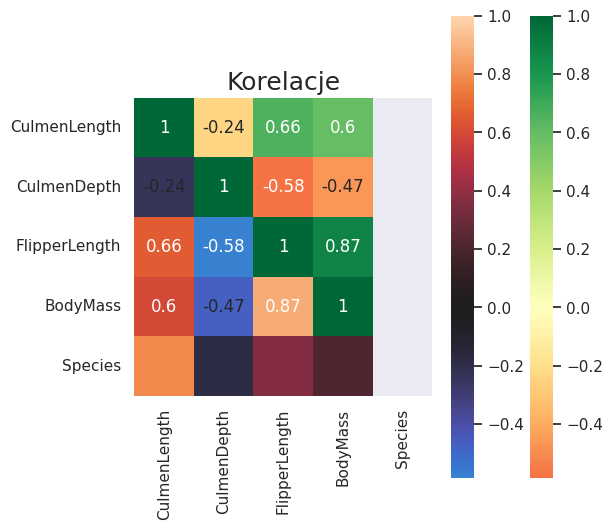

In [77]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")
np.random.seed(42)
np.set_printoptions(precision=4)
mask = np.zeros_like(corr, dtype=float)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(6, 6))
plt.title('Korelacje', fontsize=18)
sns.heatmap(X.corr(), xticklabels=X.corr().columns, yticklabels=X.corr().columns,
                 cmap='RdYlGn', center=0, annot=True)
#cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=1.0, center=0,
            square=True)
#plt.show()

Im ciemniejszy kolor tym dane są bardziej skorelowane

podział na zbiór treningowy i testowy

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)
print ('Trening: %d\nTest: %d' % (X_train.shape[0], X_test.shape[0]))

Trening: 258
Test: 86


In [89]:
features = ['CulmenLength','CulmenDepth','BodyMass']
target = 'Species'
X, y = df[features], df[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,CulmenLength,CulmenDepth,BodyMass
0,39.1,18.7,3750.0
1,39.5,17.4,3800.0
2,40.3,18.0,3250.0
3,NaN,NaN,NaN
4,36.7,19.3,3450.0
...,...,...,...
339,55.8,19.8,4000.0
340,43.5,18.1,3400.0
341,49.6,18.2,3775.0
342,50.8,19.0,4100.0



y:


,Species
0,0
1,0
2,0
3,0
4,0
...,...
339,2
340,2
341,2
342,2


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train_imputed)
X_test_standardized = scaler_2var.transform(X_test_imputed)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        31
           2       1.00      0.94      0.97        17

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



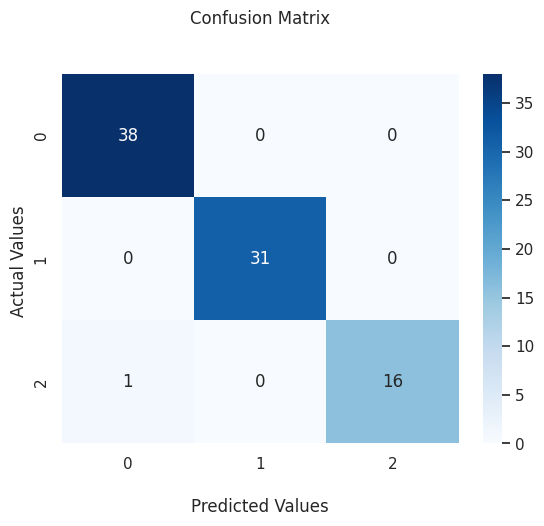

In [96]:
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

predictions_lr = model_lr.predict(X_test_standardized)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      1.00      1.00        31
           2       1.00      0.94      0.97        17

    accuracy                           0.99        86
   macro avg       0.99      0.98      0.99        86
weighted avg       0.99      0.99      0.99        86



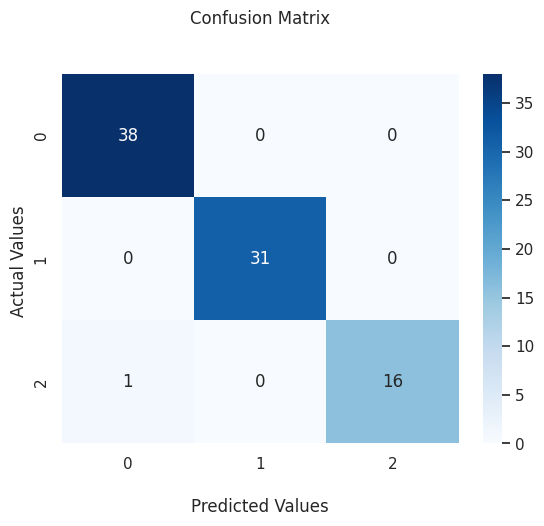

In [98]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= 10)
model_knn.fit(X_train_standardized, y_train)
predictions_lr = model_knn.predict(X_test_standardized)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [99]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [101]:
!pip install dtreeviz
from dtreeviz import trees

viz = trees.dtreeviz(model_tree, x_data=X_train, y_data=y_train,
                     target_name='Diabetic', feature_names = X_train.columns)
viz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 6.7 MB/s eta 0:00:00


AttributeError: module 'dtreeviz.trees' has no attribute 'dtreeviz'

In [105]:
from dtreeviz import dtreeviz

viz = dtreeviz(model_tree, X_train, y_train,
                     target_name='Diabetic', feature_names = X_train.columns)
viz

<ipython-input-105-d48cdb289725>:3: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


ValueError: dtreeviz does not support NaN (see column(s) CulmenLength, CulmenDepth, FlipperLength, BodyMass)

In [106]:
X_train_no_nan = X_train.dropna()
y_train_no_nan = y_train[X_train.index.isin(X_train_no_nan.index)]  # Align y_train with the dropped rows

# Now use the cleaned data for visualization
viz = dtreeviz(model_tree, X_train_no_nan, y_train_no_nan,
                     target_name='Diabetic', feature_names=X_train_no_nan.columns)
viz

<ipython-input-106-25fc307b8b20>:5: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

In [108]:
!pip install sklearn
from sklearn.impute import SimpleImputer

# Create an imputer (replace missing values with the mean of the column)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform it
X_train_imputed = imputer.fit_transform(X_train)

# Convert the imputed array back to a DataFrame (if needed)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Now use the imputed data for visualization
viz = dtreeviz(model_tree, X_train_imputed, y_train,
                     target_name='Diabetic', feature_names=X_train_imputed.columns)
viz

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<ipython-input-108-8a17a06bb350>:14: DeprecationWarning: dtreeviz() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.view()


TypeError: 'int' object is not subscriptable

Jak widać tego problemu nie mogę przeskoczyć pomimo pomocy od AI - dtreeviz

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       1.00      0.97      0.98        31
           2       0.88      0.88      0.88        17

    accuracy                           0.95        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.95      0.95      0.95        86



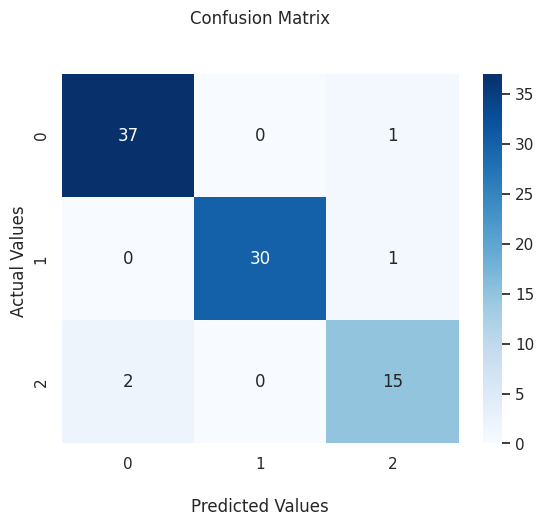

In [109]:
predictions_lr = model_tree.predict(X_test)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



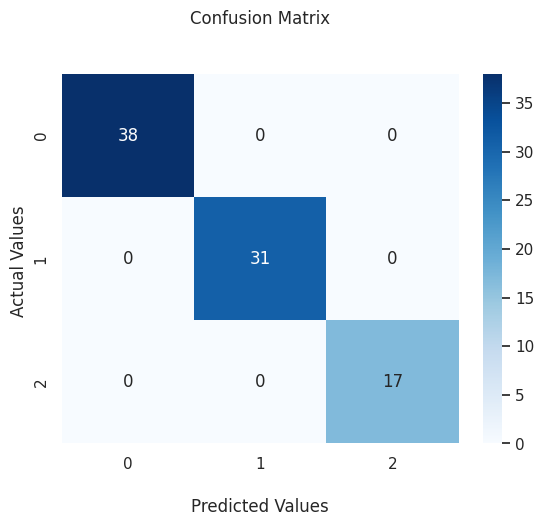

In [110]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
predictions_lr = model_svm.predict(X_test_standardized)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names


              precision    recall  f1-score   support

           0       0.97      0.92      0.95        38
           1       1.00      1.00      1.00        31
           2       0.84      0.94      0.89        17

    accuracy                           0.95        86
   macro avg       0.94      0.95      0.94        86
weighted avg       0.96      0.95      0.95        86



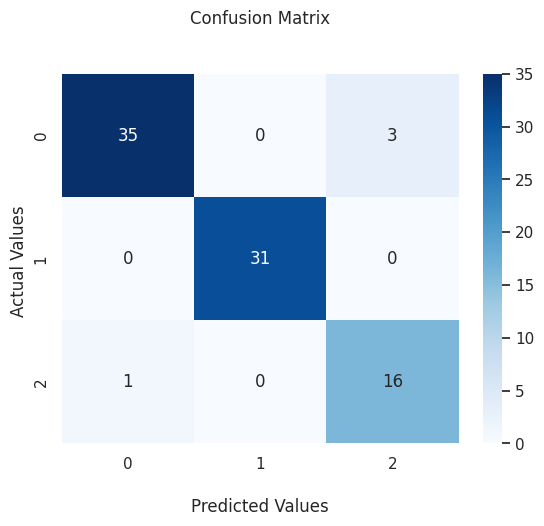

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=5)

model_forest.fit(X_train_imputed, y_train)

predictions_lr = model_forest.predict(X_test)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.97      1.00      0.98        31
           2       0.93      0.82      0.87        17

    accuracy                           0.95        86
   macro avg       0.95      0.93      0.94        86
weighted avg       0.95      0.95      0.95        86



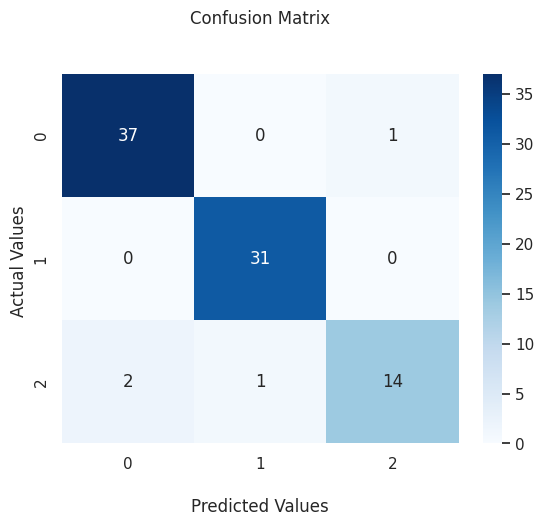

In [121]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=200)
model_adaboost.fit(X_train_imputed, y_train)
predictions_lr = model_adaboost.predict(X_test)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names


              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       1.00      1.00      1.00        31
           2       0.94      0.88      0.91        17

    accuracy                           0.97        86
   macro avg       0.96      0.95      0.96        86
weighted avg       0.96      0.97      0.96        86



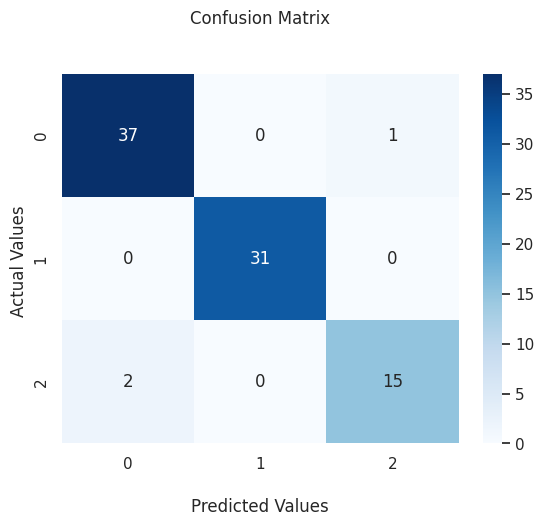

In [123]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)], voting='soft')

model_voting.fit(X_train_imputed, y_train)
predictions_lr = model_voting.predict(X_test)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        17

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



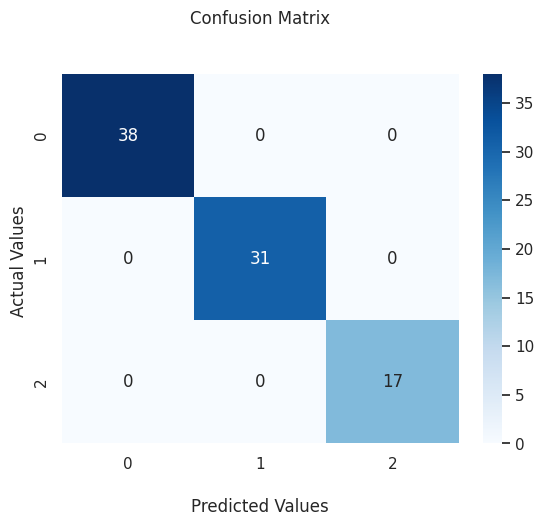

In [124]:
from sklearn.ensemble import VotingClassifier

model_voting_standardized = VotingClassifier(estimators=[('LogisticRegression', model_lr),
                                            ('SVM', model_svm),
                                            ('KNN', model_knn)],
                                voting='soft')

model_voting_standardized.fit(X_train_standardized, y_train)
predictions_lr = model_voting_standardized.predict(X_test_standardized)
print(classification_report(y_test, predictions_lr))
cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()